# Introduction: Why Gradient Descent?

In many machine learning and optimization problems, our goal is to find the parameter values that minimize a given cost function — a mathematical expression that quantifies how well a model performs.

This cost function, often denoted as $J(\boldsymbol{\beta})$, depends on a set of parameters:

$$
\boldsymbol{\beta} = [\beta_0, \beta_1, \dots, \beta_p]
$$

The optimization objective is to find:

$$
\boldsymbol{\beta}^* = \arg\min_{\boldsymbol{\beta}} J(\boldsymbol{\beta})
$$

This equation says:

> *“We want to find the value of $\boldsymbol{\beta}$ that makes the cost function $J(\boldsymbol{\beta})$ as small as possible.”*

Let’s break it down:
- $\boldsymbol{\beta}$ is a set of parameters (like weights in a model).
- $J(\boldsymbol{\beta})$ is the cost or error function — it tells us **how bad** our model is with a given set of parameters.
- $\arg\min$ means: “Give me the value of $\boldsymbol{\beta}$ that makes $J(\boldsymbol{\beta})$ the smallest.”

So,
- $\boldsymbol{\beta}^*$ is the **best** set of parameters — the one that **minimizes the cost**.

In simple cases, this can be achieved analytically. But in most real-world applications — especially those involving large datasets or complex models like neural networks — a closed-form solution is either **infeasible** or **non-existent**.

This is where **gradient-based optimization** techniques come in.

### What Is Gradient Descent?

**Gradient Descent** is a widely used iterative optimization algorithm that seeks to minimize the cost function by taking steps proportional to the **negative of the gradient** at the current point. In other words:

> Move in the direction that most rapidly decreases the cost.

<div align="center">
  <img src="https://i.sstatic.net/L0B4L.png" alt="IQR" width="500" height="330"/>
</div>

At each iteration, the parameter vector is updated using the rule:

$$
\boxed{
\boldsymbol{\beta} := \boldsymbol{\beta} - \alpha \cdot \nabla J(\boldsymbol{\beta})
}
$$

$$
\boxed{
\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \alpha \cdot \nabla J(\boldsymbol{\beta}^{(t)})
}
$$

Where:
- $\alpha$ is the **learning rate**(a small positive scalar),
- $J(\boldsymbol{\beta})$ is any differentiable cost function (e.g., MSE, cross-entropy, hinge loss, etc.),
- $\nabla J(\boldsymbol{\beta})$ is the **gradient vector**, containing partial derivatives of the cost function with respect to each parameter:

$$
\nabla J(\boldsymbol{\beta}) = 
\left[
\frac{\partial J}{\partial \beta_0}, \;
\frac{\partial J}{\partial \beta_1}, \;
\dots, \;
\frac{\partial J}{\partial \beta_p}
\right]
$$

Each component of the gradient tells us how sensitive the cost function is to changes in the corresponding parameter.

### Why Does It Work?

The gradient vector always points in the direction of **steepest ascent** of the cost function. By moving in the **opposite direction**, gradient descent ensures that we gradually move toward a **local minimum** of the cost.

### Gradient Descent in Practice

Although conceptually simple, gradient descent can behave in **unexpected and inefficient ways** depending on factors like:
- **Initialization**: Where you start matters — poor initial guesses can lead to slow convergence or local minima.
- **Learning rate**: Too small and convergence is slow; too large and the algorithm may **diverge** or oscillate.
- **Curvature of the cost surface**: Sharp valleys or flat plateaus can make progress inefficient.
- **Feature scaling** and **saddle points** may also introduce further challenges.

In the following sections, we’ll explore these behaviors in depth — not just how to implement gradient descent, but **how it behaves under different conditions**, and what you can do to make it work more effectively.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm # color map
#from mpl_toolkits import mplot3d # 3D plot required library
#from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import symbols, diff
from math import log

# Case Study 1: How Starting Point Affects Gradient Descent Efficiency

Gradient Descent is an iterative optimization algorithm. In this case study, we demonstrate how the **initial starting point** directly affects the **number of iterations** required to reach the minimum.

We define a basic quadratic function as a simulated cost function:

$$f(x) = x^2 + x + 1$$

Its derivative (gradient):

$$f’(x) = 2x + 1$$

```python
# Gradient Descent implementation
def gradient_descent(start_x, learning_rate=0.1, precision=1e-5):
    x_list = [start_x]
    slope_list = [df(start_x)]
    new_x = start_x
    iteration = 0

    while True:
        prev_x = new_x
        grad = df(prev_x)
        new_x = prev_x - learning_rate * grad

        x_list.append(new_x)
        slope_list.append(df(new_x))
        iteration += 1

        if abs(new_x - prev_x) < precision:
            break

    return x_list, slope_list, iteration
```

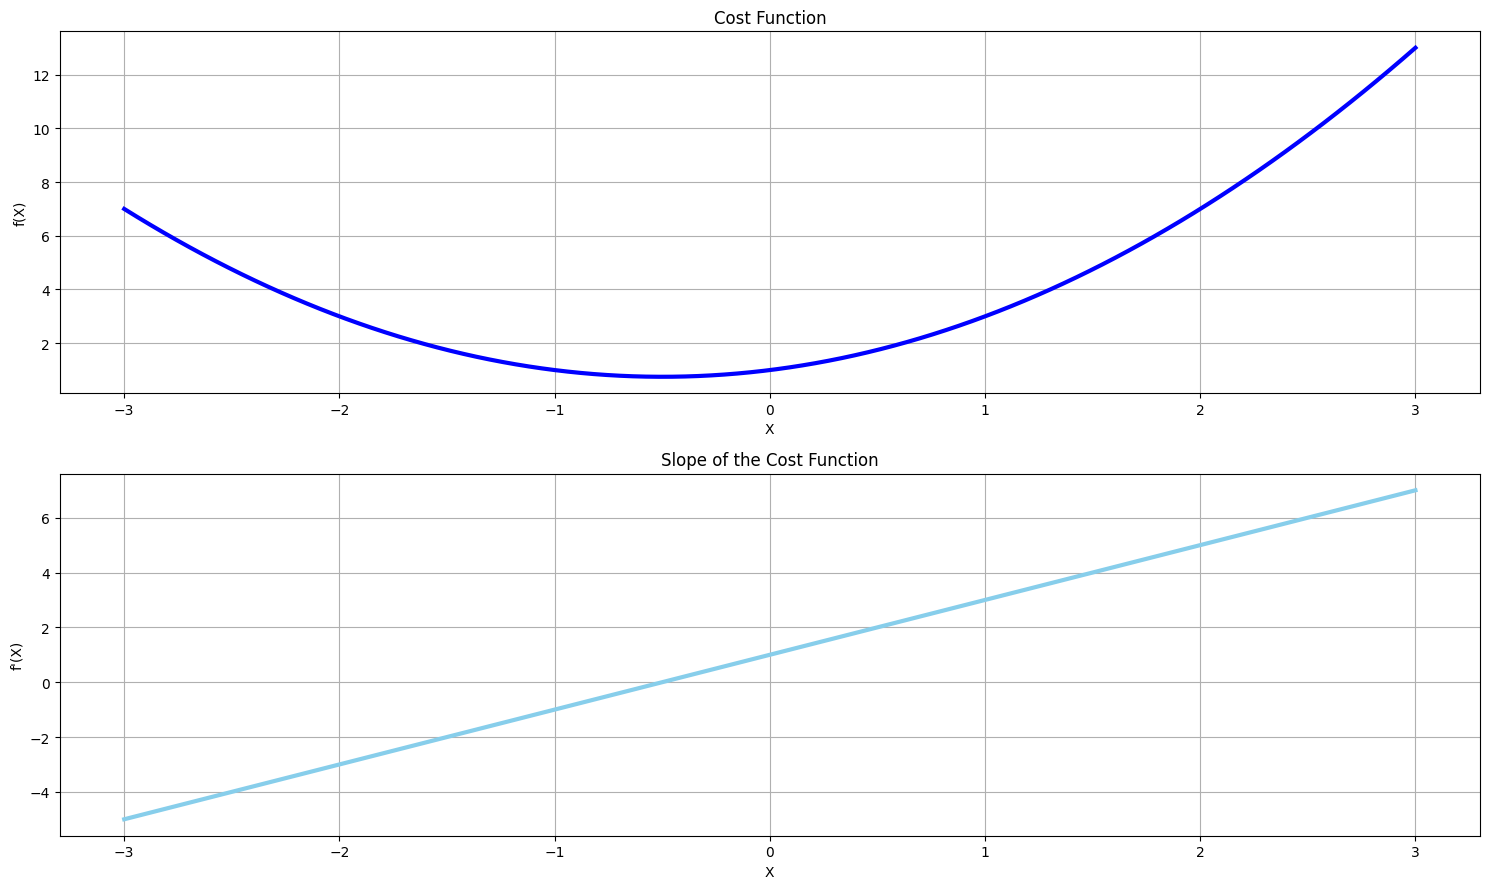

In [15]:
def f(x):
    return x**2 + x + 1

def df(x):
    return 2*x + 1

# Generate x values
x_1 = np.linspace(start=-3, stop=3, num=100)

# Plot cost function and its slope
plt.figure(figsize=(15,9))

# 1. Cost Function
plt.subplot(2,1,1)
plt.title('Cost Function')
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()

# 2. Derivative
plt.subplot(2,1,2)
plt.title('Slope of the Cost Function')
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)
plt.xlabel('X')
plt.ylabel("f'(X)")
plt.grid()

plt.tight_layout()
plt.show()

In [16]:
# Initialize
iteration = 0
x_list = []
slope_list = []

# Gradient descent function with iteration tracking
def gradient_descent(start_x, learning_rate=0.1, precision=1e-5):
    x_list = [start_x]
    slope_list = [df(start_x)]
    new_x = start_x
    iteration = 0

    while True:
        prev_x = new_x
        grad = df(prev_x)
        new_x = prev_x - learning_rate * grad

        x_list.append(new_x)
        slope_list.append(df(new_x))
        iteration += 1

        if abs(new_x - prev_x) < precision:
            break

    return x_list, slope_list, iteration

# Run gradient descent from two starting points
x_list_A, slope_list_A, iter_A = gradient_descent(start_x=3)
x_list_B, slope_list_B, iter_B = gradient_descent(start_x=-1)

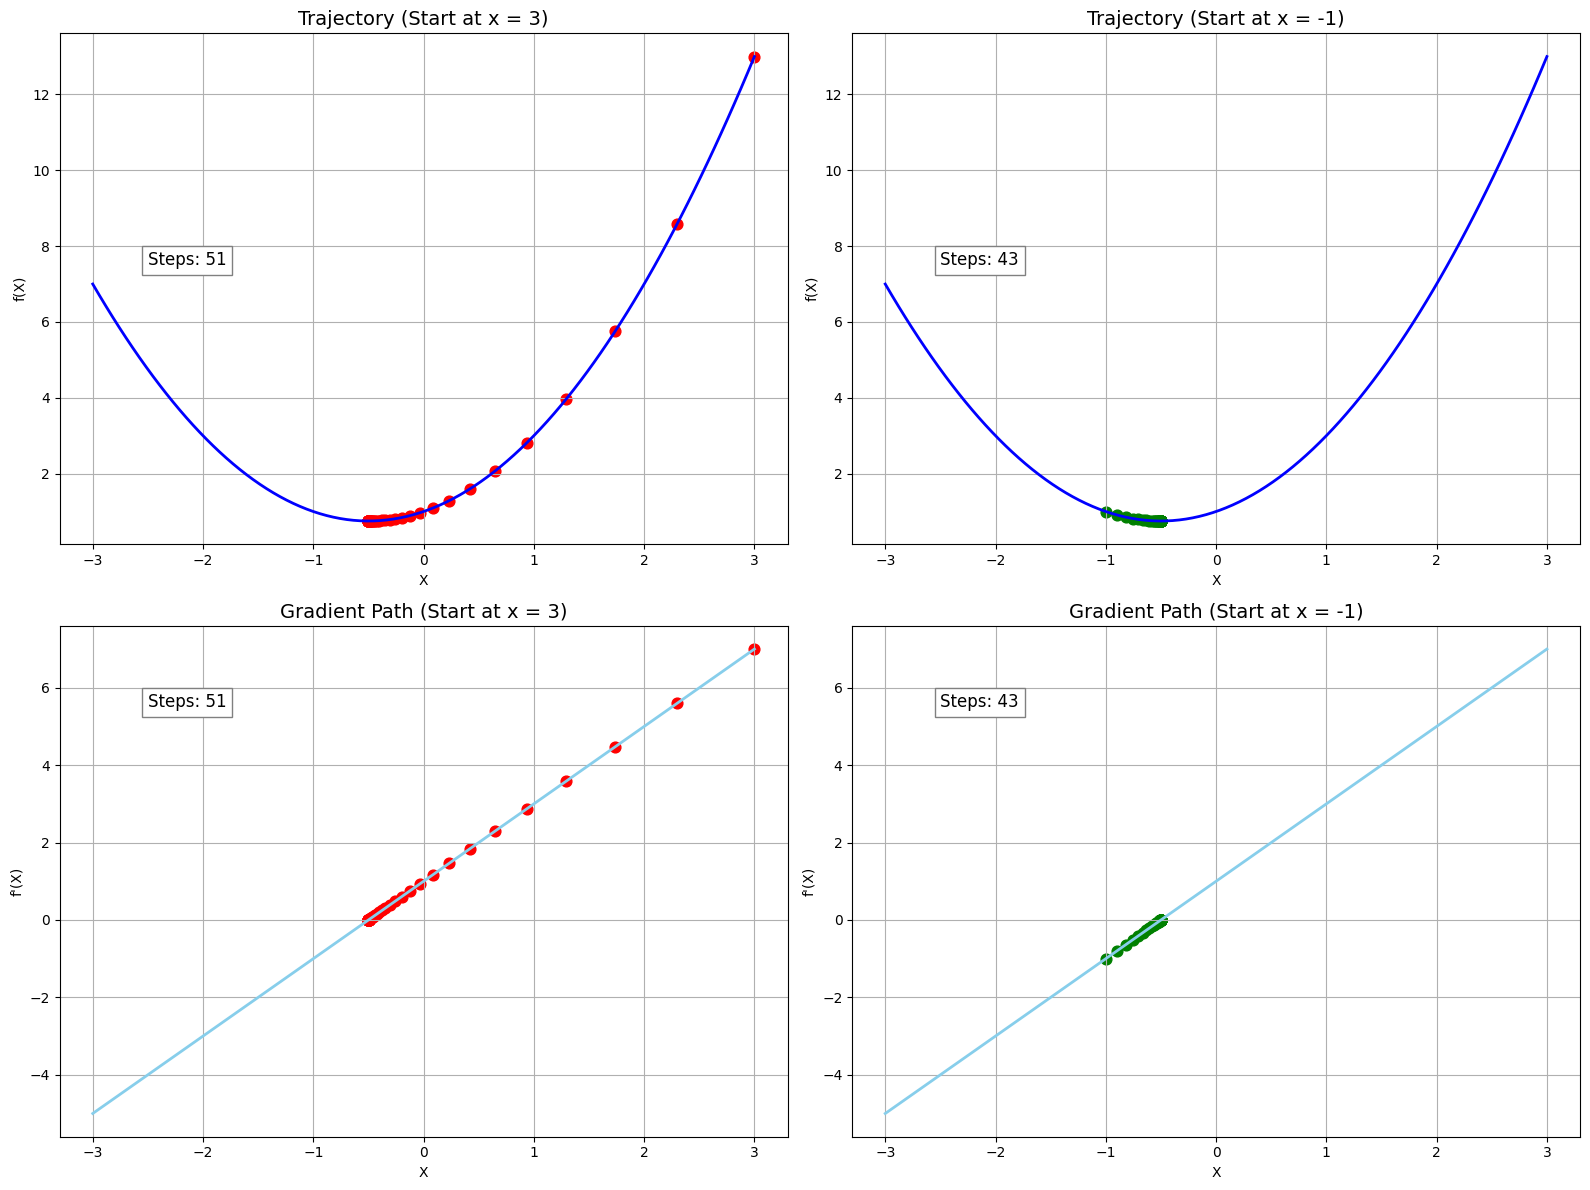

In [ ]:
# Setup
x_vals = np.linspace(-3, 3, 100)

# Plot
plt.figure(figsize=(16, 12))

# --- Top-left: Trajectory from x=3 ---
plt.subplot(2, 2, 1)
plt.title('Trajectory (Start at x = 3)', fontsize=14)
plt.plot(x_vals, f(x_vals), color='blue', linewidth=2)
plt.scatter(x_list_A, f(np.array(x_list_A)), color='red', s=60)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()
plt.text(-2.5, 7.5, f'Steps: {iter_A}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# --- Top-right: Trajectory from x=-1 ---
plt.subplot(2, 2, 2)
plt.title('Trajectory (Start at x = -1)', fontsize=14)
plt.plot(x_vals, f(x_vals), color='blue', linewidth=2)
plt.scatter(x_list_B, f(np.array(x_list_B)), color='green', s=60)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()
plt.text(-2.5, 7.5, f'Steps: {iter_B}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# --- Bottom-left: Slope from x=3 ---
plt.subplot(2, 2, 3)
plt.title("Gradient Path (Start at x = 3)", fontsize=14)
plt.plot(x_vals, df(x_vals), color='skyblue', linewidth=2)
plt.scatter(x_list_A, slope_list_A, color='red', s=60)
plt.xlabel('X')
plt.ylabel("f'(X)")
plt.grid()
plt.text(-2.5, 5.5, f'Steps: {iter_A}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# --- Bottom-right: Slope from x=-1 ---
plt.subplot(2, 2, 4)
plt.title("Gradient Path (Start at x = -1)", fontsize=14)
plt.plot(x_vals, df(x_vals), color='skyblue', linewidth=2)
plt.scatter(x_list_B, slope_list_B, color='green', s=60)
plt.xlabel('X')
plt.ylabel("f'(X)")
plt.grid()
plt.text(-2.5, 5.5, f'Steps: {iter_B}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()

### Observation

This experiment confirms that the s**tarting point of Gradient Descent significantly affects convergence efficiency**, even for a simple convex function like:

$$f(x) = x^2 + x + 1$$
- When starting at x = 3, it takes **51 steps** to reach the minimum.
- When starting at x = -1, it takes **43 steps**, despite being closer to the true minimum at x = -0.5.

### Key Insights

| Starting Point | Steps to Converge | Distance from Minimum | Initial Gradient | Comments |
|----------------|-------------------|------------------------|------------------|----------|
| `x = 3`        | 51                | 3.5 units              | Large positive   | Overshoots initially, then slowly descends |
| `x = -1`       | 43                | 0.5 units              | Small negative   | Starts closer, but smaller slope leads to slower early movement |

- A **larger initial slope** can sometimes help move faster initially, but risks oscillations or overshooting if learning rate is not well-tuned.
- A **smaller slope** near the minimum might cause slower early updates, even though the point is closer to the optimum.
- Thus, **"closer ≠ always faster"** if the slope is too flat.

### Takeaway

> **Gradient Descent is sensitive to the initial point.**
>
> Even on a simple quadratic, the step count can vary significantly based on the distance to the minimum and the steepness of the slope at the starting point.

In real-world high-dimensional problems:
- Poor initialization can lead to **slow convergence** or **getting stuck in plateaus**.
- Good initialization strategies (e.g., Xavier, He) are **not just tricks**—they are **essential for performance**.

### How to Choose a Good Initial Value in Gradient Descent

The choice of initial value affects **convergence speed**, **stability**, and whether the model can **escape poor local minima**. Here’s how to do it right:

1. If the Problem is Convex (e.g., Linear Regression)

- You **can choose any random value**, and gradient descent will eventually converge.
- But:
  - Starting **too far from the minimum** → slow convergence
  - Starting **in a flat region** → small gradients, slow updates

**Tip:**  
Use small random values near 0, like:

```python
x_init = np.random.uniform(-1, 1)
```

2. If the Problem is Non-Convex (e.g., Neural Networks)

Poor initialization can cause:
- Vanishing or exploding gradients
- Getting stuck in poor local minima
- Failed or slow convergence

Xavier Initialization (Glorot)

Best for sigmoid, tanh, etc.

$$
W \sim \mathcal{U}\left[-\frac{\sqrt{6}}{\sqrt{n_{\text{in}} + n_{\text{out}}}}, \frac{\sqrt{6}}{\sqrt{n_{\text{in}} + n_{\text{out}}}}\right]
$$

He Initialization

Best for ReLU, LeakyReLU:

$$
W \sim \mathcal{N}(0, \sqrt{\frac{2}{n_{\text{in}}}})
$$

3. Data-aware Initialization
- Normalize inputs: mean = 0, std = 1
- Use domain knowledge if available
- For time-series/spatial problems, initialize from recent values or bounded centers

4. Multi-start Strategy (Random Restarts)
- Try several random initializations
- Pick the one that converges to the lowest cost

```python
best_result = min([gradient_descent(x0) for x0 in range(-3, 4)], key=lambda res: res.cost)
```

> ### Example 2 - Multiple Minima vs Initial Guess and Advanced Functions
> 模拟算数寻找最低点
$$g(x) = x^4 - x^2 + 5$$

In [9]:
# Generating some data
x_2 = np.linspace(start = -2, stop = 2, num = 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

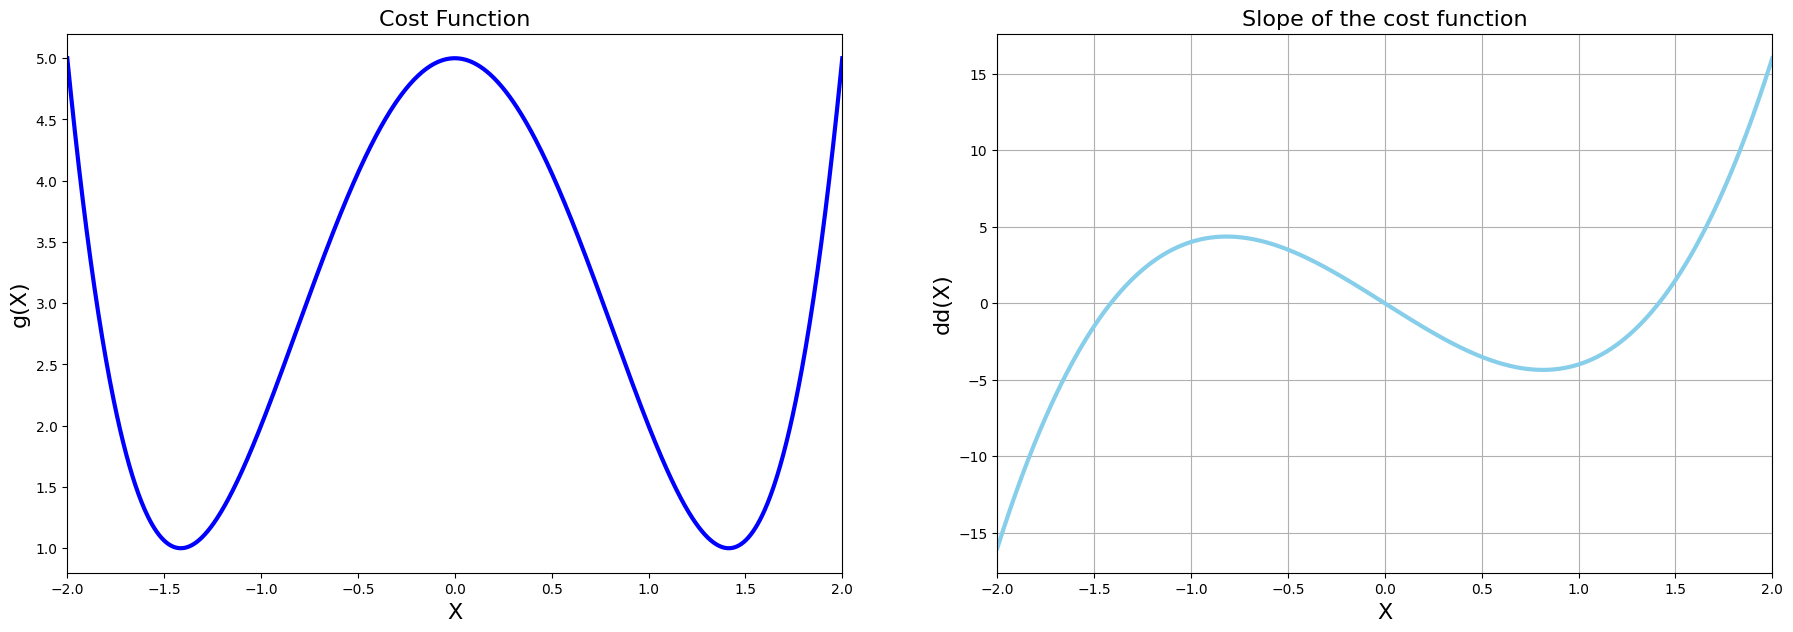

In [10]:
plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-2,2)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(X)', fontsize = 16)
plt.plot(x_2,g(x_2), color = 'blue', linewidth = 3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dd(X)', fontsize = 16)
plt.xlim(-2,2)
plt.grid()
plt.plot(x_2,dg(x_2), color ='skyblue', linewidth = 3)

plt.show()

In [11]:
def gradient_descent(derivative_func, initial_guess, learning_rate = 0.02, precision = 0.001, max_iter = 300):
    new_x = initial_guess
    multiplier = learning_rate

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    step_size = precision + 1
    iter_num = 1

    while step_size > precision:        
        if iter_num > max_iter:
            break 

        previous_x = new_x
        gradient = derivative_func(previous_x) # calculating slope
        new_x = previous_x - multiplier * gradient # Updating X value

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        iter_num = iter_num + 1
    
    return new_x, x_list, slope_list

In [12]:
local_min, x_list2, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5, learning_rate=0.01, precision=0.0001)

print('Local min occurs at:', local_min)
print('Number of iterations:', len(x_list2))

Local min occurs at: 1.4137636556157256
Number of iterations: 56


In [13]:
local_min, x_list2, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, learning_rate=0.02, precision=0.001)

print('Local min occurs at:', local_min)
print('Number of iterations:', len(x_list2))

Local min occurs at: -1.4122375085019094
Number of iterations: 23


我们在下面进行的操作称为批量梯度下降（Batch Gradient Descent），你可以观察到：
1. 选择一个随机的初始猜测会影响得到局部最小值的结果,如下图实例所示，由于数据中存在两个最低点，所以选择不同的起始点，可能会寻找到不同的最低点。
2. 在不了解代价函数的情况下，你无法确定是局部最小值还是全局最小值
3. 在不了解代价函数的情况下，你无法找到局部最小值的数量

随机梯度下降（Stochastic Gradient Descent）可能会解决这个问题。

注意：每种梯度下降方法都有各自的优缺点，选择合适的梯度下降方法来应对特定的应用或情况是你的责任。

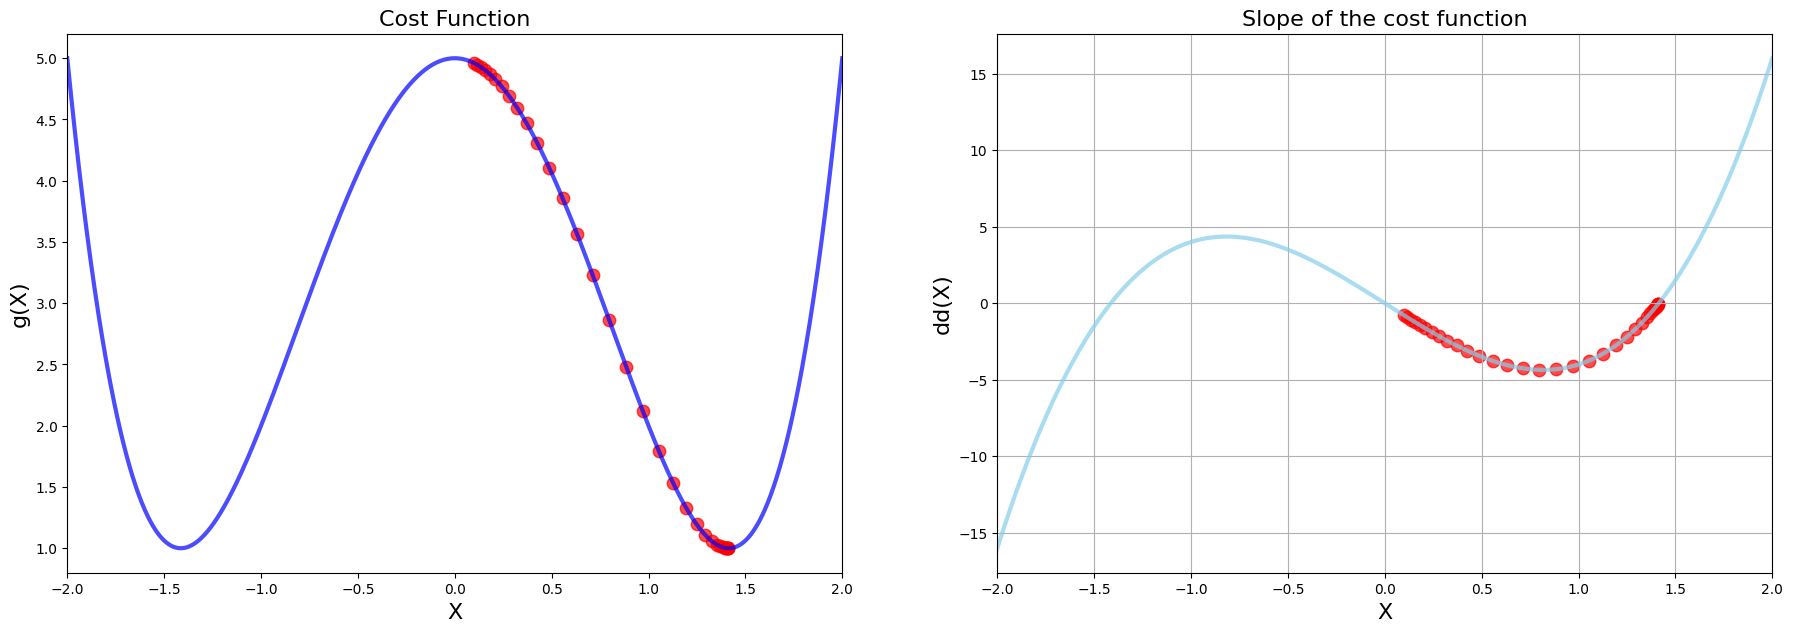

In [14]:
# Calling gradient descent function
local_min, x_list2, slope_list2 = gradient_descent(derivative_func=dg, initial_guess=0.1, learning_rate=0.02, precision=0.001)


plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-2,2)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(X)', fontsize = 16)
plt.plot(x_2,g(x_2), color = 'blue', linewidth = 3, alpha = 0.7)

plt.scatter(x_list2,g(np.array(x_list2)), color ='red', s = 80, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dd(X)', fontsize = 16)
plt.xlim(-2,2)
plt.grid()
plt.plot(x_2,dg(x_2), color ='skyblue', linewidth = 3, alpha = 0.7)
plt.scatter(x_list2, slope_list2, color ='red', s = 80, alpha=0.7)

plt.show()

> ### Example 3 - 发散(Divergence)与溢出(overflow)
$$h(x) = x^5 - 2x^4 + 2$$

In [15]:
# Generating data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

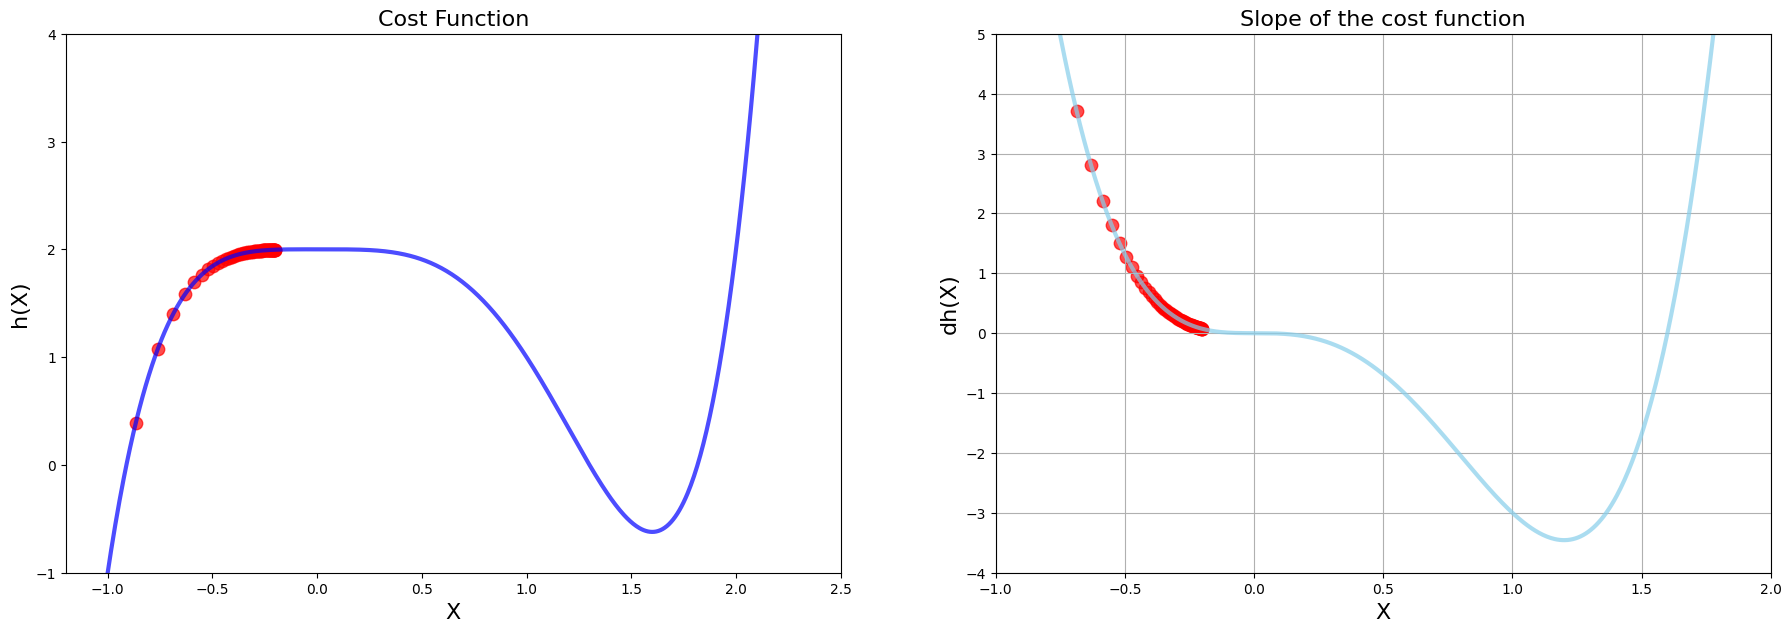

Local minimum occurs at: -2071072.4470816324
Slope or df(x) value at this point is: 9.199230561666396e+25
Cost at this min point is -3.810455326061589e+31
Number of iterations: 71


In [16]:
# Calling gradient descent function
local_min3, x_list3, slope_list3 = gradient_descent(derivative_func=dh, initial_guess=-0.2, learning_rate=0.02, precision=0.001, max_iter= 70)


plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-1.2 , 2.5)
plt.ylim(-1, 4)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(X)', fontsize = 16)
plt.plot(x_3,h(x_3), color = 'blue', linewidth = 3, alpha = 0.7)

plt.scatter(x_list3,h(np.array(x_list3)), color ='red', s = 80, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dh(X)', fontsize = 16)
plt.xlim(-1 , 2)
plt.ylim(-4,5)
plt.grid()
plt.plot(x_3,dh(x_3), color ='skyblue', linewidth = 3, alpha = 0.7)
plt.scatter(x_list3, slope_list3, color ='red', s = 80, alpha=0.7)

plt.show()

print('Local minimum occurs at:', local_min3)
print('Slope or df(x) value at this point is:', dh(local_min3))
print('Cost at this min point is', h(local_min3))
print('Number of iterations:', len(x_list3))

我们可以看到上述这种情况，x是向左边移动，而且移动的间距越来越大，如果不是设定了iteration的上限的话，他还会继续往左移动，而且RSS值不减少，反而增加。发散（divergence） 是指在迭代更新参数的过程中，损失函数的值不减小，反而持续增大，最终远离最优解的现象。

导致发散的原因：

1.	学习率（learning rate）过大：学习率决定了每次参数更新时移动的步长。如果学习率太大，每次参数更新的步伐就会过大，可能会跳过最优解，导致模型参数远离最优值，造成损失函数的值逐渐增大。
2.	特征未标准化：如果输入数据的特征尺度差异较大，梯度下降过程中更新的步长可能会不一致，某些方向上变化过快，导致发散。
3.	数据噪声：数据中存在较多的噪声或异常值也可能导致梯度下降出现不稳定，进而引发发散现象。

如何避免发散：

1.	调整学习率：通过降低学习率，减小每次参数更新的步长，确保梯度下降朝着正确的方向逐步靠近最优解。常见的方法是从较小的学习率开始（比如  \alpha = 0.01 ），然后通过实验逐渐调整。
2.	标准化输入数据：将输入数据进行标准化或归一化处理，使得各个特征值的尺度相近，这有助于稳定梯度下降过程。
3.	使用自适应学习率方法：像 Adam、RMSprop 等优化算法可以自适应调整学习率，防止发散。

# 收敛性与学习率选择
---

- 学习率的影响

  - 学习率过大：较高的学习率通常会有更好的效率。然而，如果选择的学习率过高，仍然会出现问题。可能导致参数在最优点附近来回震荡，甚至发散，无法收敛。
  
  - 学习率过小：收敛速度慢，增加计算成本。
  
  - 选择合适的学习率可能需要花费时间，但学习一些关于如何选择学习率的技巧是很有意义的。

- 自适应学习率方法。为了克服固定学习率的缺陷，常用的自适应学习率算法包括：

  - AdaGrad：根据参数的历史梯度调整学习率。
  
  - RMSProp：对 AdaGrad 进行改进，解决其学习率持续减小的问题。
  
  - Adam：结合动量和 RMSProp 的优点，效果显著。

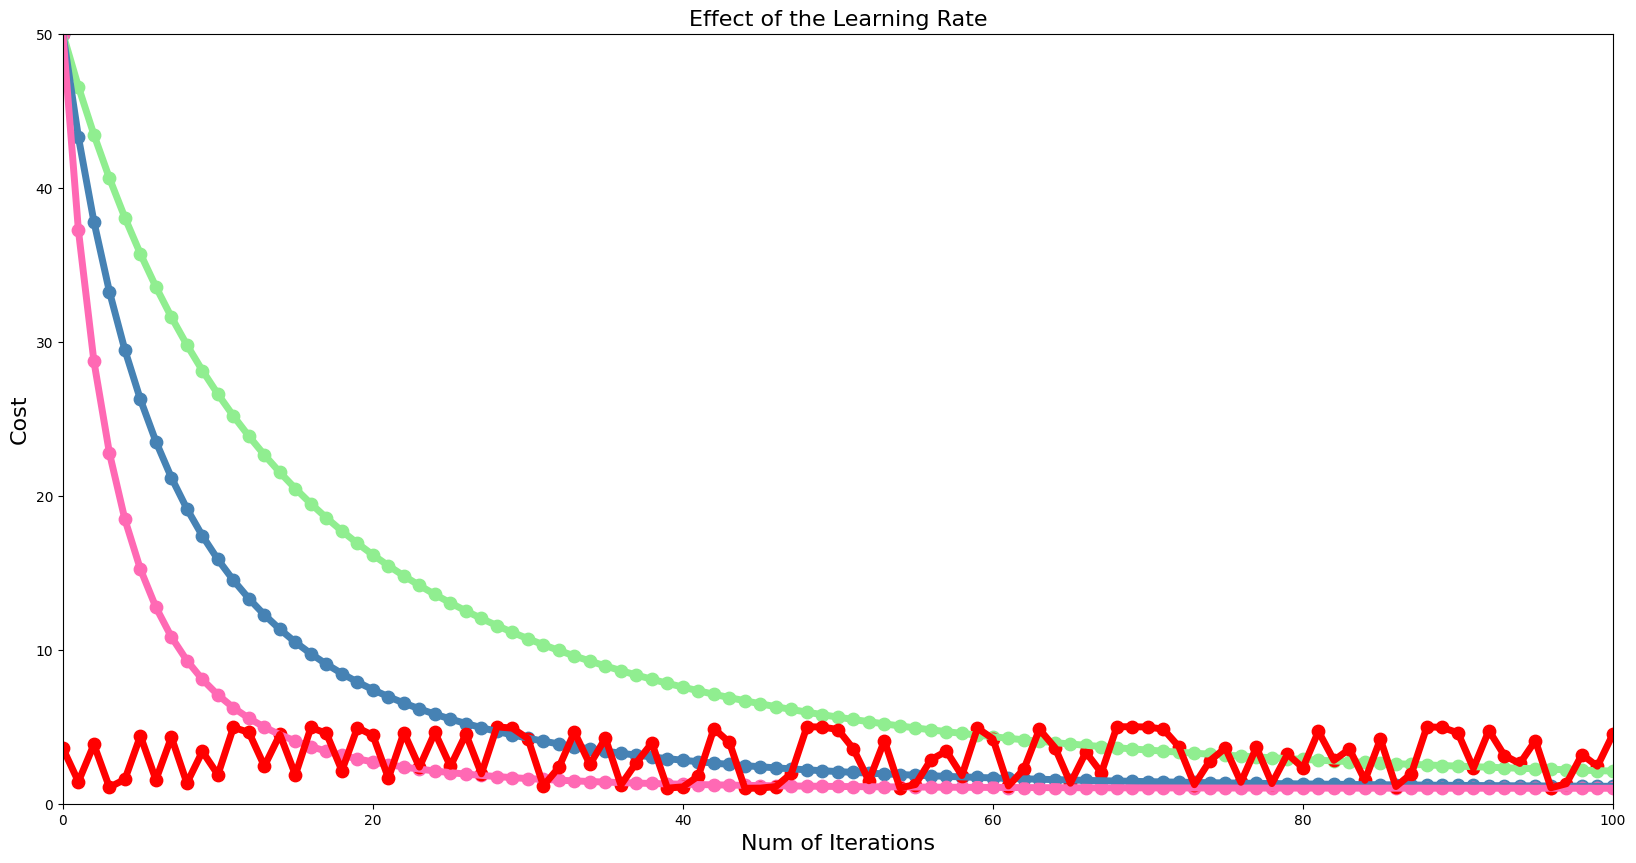

In [17]:

# Calling gradient descent function
n = 100
# low_gamma is a tuples(structure in C)
# Low_gamma[0] = local_min; low_gamma[1] = x_list; low_gamma[2] = slope_list
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, learning_rate=0.0005, precision=0.0001, max_iter= n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, learning_rate=0.001, precision=0.0001, max_iter= n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, learning_rate=0.002, precision=0.0001, max_iter= n)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, learning_rate=0.25, precision=0.0001, max_iter= n)

plt.figure(figsize=(20,10))
plt.title('Effect of the Learning Rate', fontsize = 16)
plt.xlim(0, n)
plt.ylim(0 , 50)
plt.xlabel('Num of Iterations', fontsize = 16)
plt.ylabel('Cost', fontsize = 16)

# Chart: Low gamma value to learning rate
low_values = np.array(low_gamma[1])
iteration_list = list(range(0, n+1))
plt.plot(iteration_list, g(low_values), color = 'lightgreen', linewidth = 5)
plt.scatter(iteration_list, g(low_values), color = 'lightgreen', s = 80)

# Chart: mid gamma value to learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color = 'steelblue', linewidth = 5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color = 'steelblue', s = 80)

# Chart: high gamma value to learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color = 'hotpink', linewidth = 5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color = 'hotpink', s = 80)

# Chart: insane gamma value to learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color = 'red', linewidth = 5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color = 'red', s = 80)

plt.show()

# 梯度下降法多特征方程
---

> ### 梯度下降法与RSS的关系

在线性回归中，我们的目标是找到合适的模型参数（回归系数），使得预测值 $\hat{y}$ 与真实值 y 的差距最小。这个差距通过残差平方和（RSS）来衡量，公式为：
$$RSS(\theta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

我们希望找到一条直线  $y = wx+b$  来拟合这些数据。我们的目标是最小化残差平方和（RSS）

这里，$\theta$ 是我们要优化的参数，比如线性回归中的权重 $w$ 和截距 $b$。为了优化这些参数，我们使用梯度下降法来迭代更新，使得RSS最小化。

计算RSS的梯度：梯度是RSS相对于参数 $w$ 和 $b$ 的偏导数，表示RSS的变化方向。对于每个参数 $w$ 和 $b$，梯度分别是：

$$\frac{\partial RSS}{\partial w} = -2 \sum_{i=1}^{n} x_i (y_i - \hat{y}i)$$

$$\frac{\partial RSS}{\partial b} = -2 \sum{i=1}^{n} (y_i - \hat{y}_i)$$

更新参数：根据梯度下降的规则，我们调整参数，使RSS沿着梯度减少的方向更新。更新公式为：

$$ w_{\text{new}} = w_{\text{old}} - \alpha \frac{\partial RSS}{\partial w} $$

$$ b_{\text{new}} = b_{\text{old}} - \alpha \frac{\partial RSS}{\partial b} $$

$\alpha$ 是学习率，它决定了每次更新参数的步长。这个是要根据经验来手动选择。

> ### 示例概述

假设我们有一组二维数据点，我们希望找到一条直线  $y = wx + b$  来拟合这些数据。我们的目标是最小化残差平方和（RSS）：

$$RSS = \sum_{i=1}^{n} (y_i - (w x_i + b))^2$$

- b是y-int，它代表了Error误差项，很多时候我们在做理解的时候，不考虑它也没问题。

通过梯度下降法，我们可以迭代调整参数  $w$  和  $b$  以最小化 RSS。

数据集: 假设我们有以下5个数据点：

| x | y |
|------|-------|
| 1    | 2    | 
| 2    | 3    | 
| 3    | 4    | 
| 4    | 5    | 
| 5    | 6    | 

初始化参数: 我们随机初始化参数  $w$  和  $b$ 。为了简单起见，假设初始值 $w = 0$, $\quad b = 0$

计算 RSS 和梯度: 

- 计算当前模型的 RSS：$RSS = \sum_{i=1}^{5} (y_i - (w x_i + b))^2$

- 计算对  w  和  b  的偏导数（梯度）：

$$ \frac{\partial RSS}{\partial w} = -2 \sum_{i=1}^{5} x_i (y_i - (w x_i + b))$$

$$\frac{\partial RSS}{\partial b} = -2 \sum_{i=1}^{5} (y_i - (w x_i + b))$$

梯度下降步骤: 

1. 第一次迭代

\begin{align*}
\hat{y}_1 &= 0 \times 1 + 0 = 0 & \text{误差} &= 2 - 0 = 2 \\
\hat{y}_2 &= 0 \times 2 + 0 = 0 & \text{误差} &= 3 - 0 = 3 \\
\hat{y}_3 &= 0 \times 3 + 0 = 0 & \text{误差} &= 5 - 0 = 5 \\
\hat{y}_4 &= 0 \times 4 + 0 = 0 & \text{误差} &= 4 - 0 = 4 \\
\hat{y}_5 &= 0 \times 5 + 0 = 0 & \text{误差} &= 6 - 0 = 6 \\
\end{align*}

计算 RSS: $RSS = 2^2 + 3^2 + 5^2 + 4^2 + 6^2 = 4 + 9 + 25 + 16 + 36 = 90$

计算梯度:

$$ \frac{\partial RSS}{\partial w} = -2 (1 \times 2 + 2 \times 3 + 3 \times 5 + 4 \times 4 + 5 \times 6) = -2 (2 + 6 + 15 + 16 + 30) = -2 \times 69 = -138 $$

$$ \frac{\partial RSS}{\partial b} = -2 (2 + 3 + 5 + 4 + 6) = -2 \times 20 = -40 $$

更新参数:

$\alpha$ 是学习率，它决定了每次更新参数的步长。这个是要手动选择，这个实例中我们假设：$\alpha = 0.01$

$$ w_{\text{new}} = w - \alpha \times \frac{\partial RSS}{\partial w} = 0 - 0.01 \times (-138) = 1.38$$

$$ b_{\text{new}} = b - \alpha \times \frac{\partial RSS}{\partial b} = 0 - 0.01 \times (-40) = 0.4 $$

2. 第二次迭代

更新参数后计算预测值和误差

\begin{align*}
\hat{y}_1 &= 1.38 \times 1 + 0.4 = 1.78 & \text{误差} &= 2 - 1.78 = 0.22 \\
\hat{y}_2 &= 1.38 \times 2 + 0.4 = 3.16 & \text{误差} &= 3 - 3.16 = -0.16 \\
\hat{y}_3 &= 1.38 \times 3 + 0.4 = 4.54 & \text{误差} &= 5 - 4.54 = 0.46 \\
\hat{y}_4 &= 1.38 \times 4 + 0.4 = 5.92 & \text{误差} &= 4 - 5.92 = -1.92 \\
\hat{y}_5 &= 1.38 \times 5 + 0.4 = 7.9 & \text{误差} &= 6 - 7.9 = -1.9 \\
\end{align*}


计算 RSS: $ RSS = 0.22^2 + (-0.16)^2 + 0.46^2 + (-1.92)^2 + (-1.9)^2 \approx 0.0484 + 0.0256 + 0.2116 + 3.6864 + 3.61 = 7.581 $

计算梯度

$$ \frac{\partial RSS}{\partial w} = -2 (1 \times 0.22 + 2 \times (-0.16) + 3 \times 0.46 + 4 \times (-1.92) + 5 \times (-1.9)) $$
$$ = -2 (0.22 - 0.32 + 1.38 - 7.68 - 9.5) $$
$$ = -2 (-16.0) = 32.0 $$

$$ \frac{\partial RSS}{\partial b} = -2 (0.22 - 0.16 + 0.46 - 1.92 - 1.9) = -2 (-3.3) = 6.6 $$

更新参数

$$ w_{\text{new}} = 1.38 - 0.01 \times 32.0 = 1.38 - 0.32 = 1.06 $$

$$ b_{\text{new}} = 0.4 - 0.01 \times 6.6 = 0.4 - 0.066 = 0.334 $$





> ### Example - Data Viz with 3D Charts

$$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

minimise $$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2-y^2}$

In [18]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / ( r + 1)

# Generating data
# X data type is numpy array
X = np.linspace(start = -2, stop = 2, num = 200) 
y = np.linspace(start = -2, stop = 2, num = 200)

print('Shape of X array', X.shape)

X, y = np.meshgrid(X,y) # 3D plot require 2D input
print('Shape after mesh', X.shape)

Shape of X array (200,)
Shape after mesh (200, 200)


我们随便画一个3D的图，我们可以一般用Z轴表示目标，用X,Y轴表示特征。

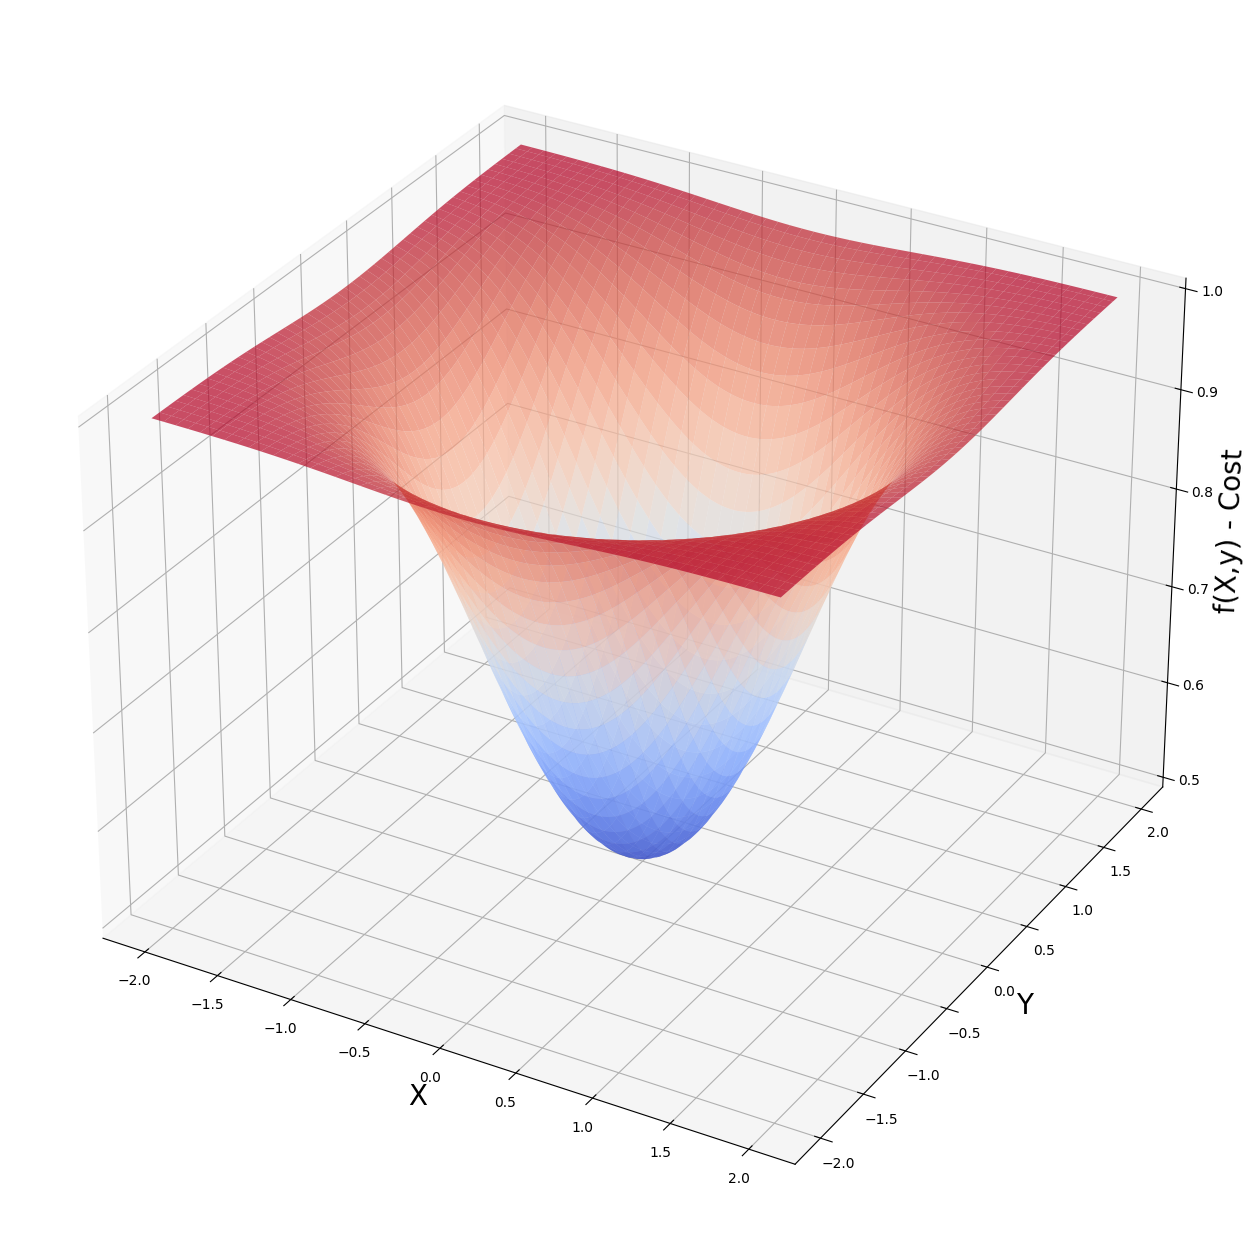

In [20]:
# Generating 3D plot
fig = plt.figure(figsize= [16,16])
ax = plt.axes(projection = '3d')

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X,y) - Cost', fontsize = 20)

ax.plot_surface(X,y,np.array(f(X,y)), cmap = cm.coolwarm, alpha = 0.7)
plt.show()

### Partial Derivatives & Symbolic Computation
### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{( 3^ { -x^2 - y^2 }+1)^2}$$
### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{( 3^ { -x^2 - y^2 }+1)^2}$$

In [21]:
a, b = symbols('x,y')
print('Out cost function f(x,y) is:', f(a,b))
print('Partial derivative wrt x is:', diff(f(a,b),a))
print('Partial derivative wrt y is:', diff(f(a,b),b))
print('Value of f(x,y) at x=1.8 y=1.0 is:',f(a,b).evalf(subs={a:1.8,b:1.0})) # evaluate cost function at x = 1.8 and y = 1.0
print('Value of partial derivative wrt x at x=1.8 y=1.0 is:',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})) # evaluate cost function at x = 1.8 and y = 1.0

Out cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative wrt y is: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative wrt x at x=1.8 y=1.0 is: 0.0368089716197505


### Batch Gradient Descent with Sympy
**Calculating gradient with SymPy:**<br>

This is a slower process because FOR loop will perform diff every single iteration

In [22]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


**Calculating Gradient by Providing partial derivative function:**<br>

This will be much faster because you don't need to calculate partial derivative in the FOR loop

In [23]:
# Partial derivative functions

def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [24]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


### Graphing 3D Gradient Descent & Adv Numpy Arrays

In [25]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought','MC'],['Questlove', 'Drums']])
print(hs_band.shape)

# Selecting array
print('selecting the first row hs_band[0]:', hs_band[0])
print('hs_band[0][0]:', hs_band[0][0])

# axis is a really confusing parameters
# axis = 0 means adding element in row
# axis = 1 means adding element in column
the_roots = np.append(arr=hs_band, values = kirk.reshape(2,1) , axis = 1) # adding column
print(the_roots)

the_roots = np.append(arr=hs_band, values = kirk , axis = 0) # adding row
print(the_roots)

print('Printing names', the_roots[:, 0]) # print first column

(1, 2)
(2, 2)
selecting the first row hs_band[0]: ['Black Thought' 'MC']
hs_band[0][0]: Black Thought
[['Black Thought' 'MC' 'Captain']
 ['Questlove' 'Drums' 'Guitar']]
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing names ['Black Thought' 'Questlove' 'Captain']


In [26]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params
print(values_array.shape) ## 2 rows
values_array = params.reshape(1,2) # convert to 1 row 2 column
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    values_array = np.append(arr=values_array, values=params.reshape(1,2),axis=0)
    # alternatively, you can append with concatenate operation as well
    #values_array = np.concatenate((values_array, params.reshape(1,2)),axis=0)

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

(2,)
(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


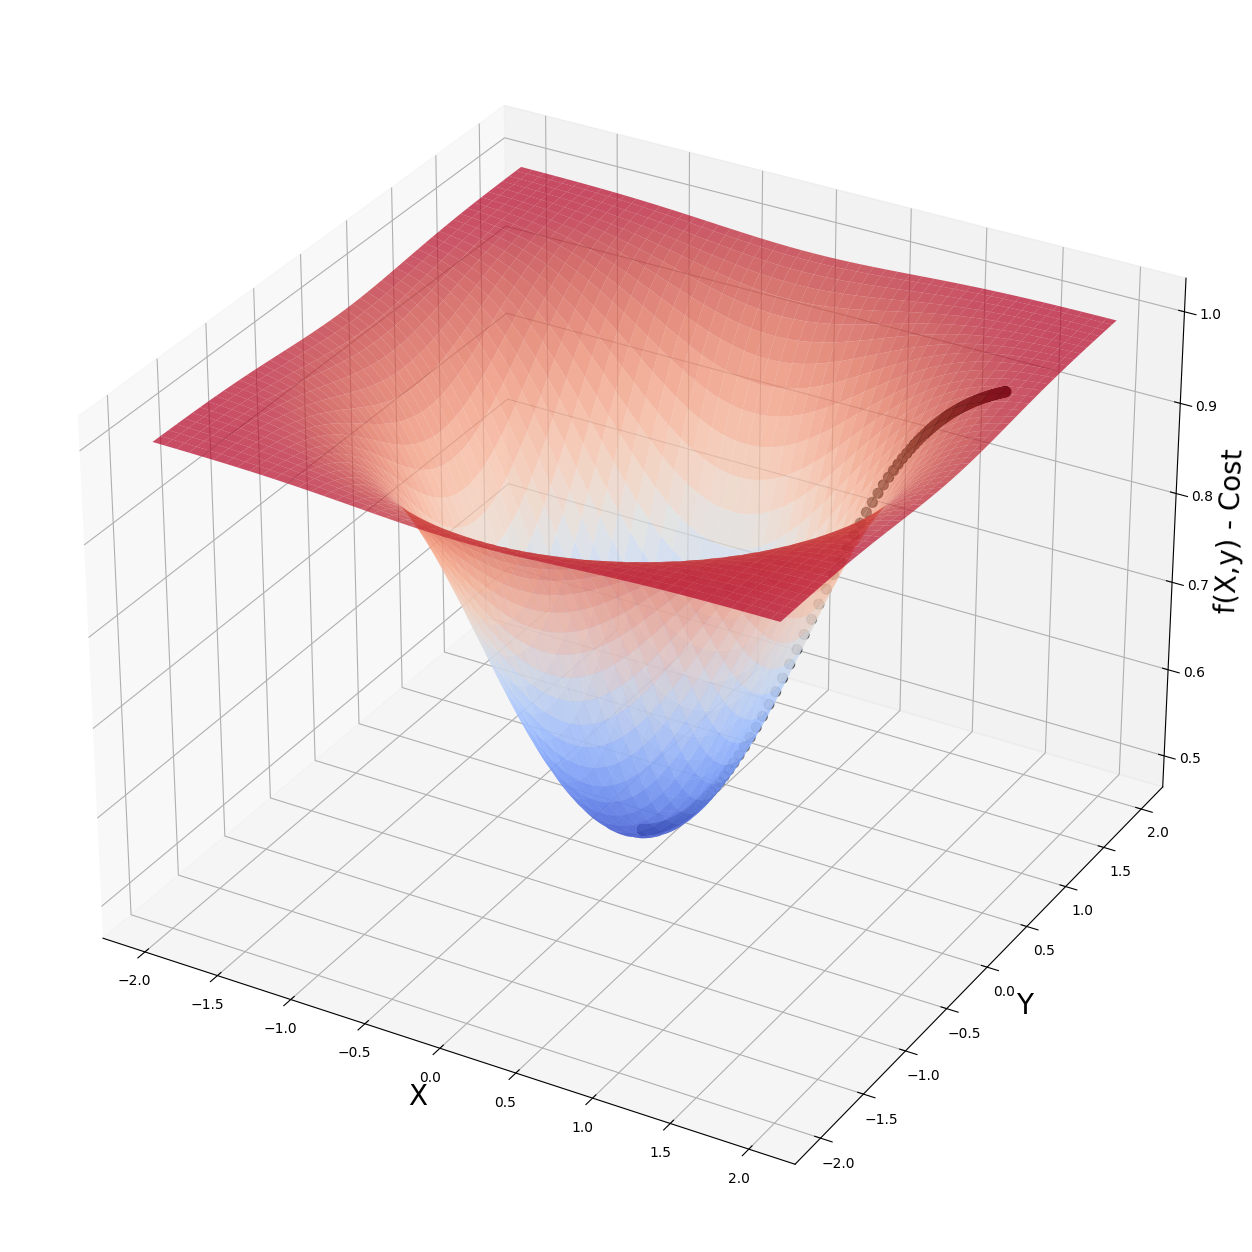

In [27]:
# Generating 3D plot
fig = plt.figure(figsize= [16,16])
ax = plt.axes(projection = '3d')

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X,y) - Cost', fontsize = 20)

ax.plot_surface(X,y,np.array(f(X,y)), cmap = cm.coolwarm, alpha = 0.7)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]), s = 50, color = 'black')

plt.show()

# 梯度下降法（Gradient Descent）
---

在机器学习中，我们通常需要**最小化一个损失函数**（Cost Function）来衡量模型的预测值与真实值之间的差异。优化问题的目标就是找到使损失函数达到最小值的参数组合。

梯度是一个向量，包含了函数在各个变量方向上的一阶偏导数。它表示函数在某一点的变化率和方向。

假设我们的模型只有一个特征  x ，模型的形式可以表示为：

$$ y = \theta_0 + \theta_1 x $$

- y  是预测值。

- $\theta_0$  是截距项。

- $\theta_1$  是特征  x  的权重。

在回归问题中，常用的损失函数是均方误差（Mean Squared Error, MSE），定义为：

$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - (\theta_0 + \theta_1 x_i))^2 $$

-  m  是样本数量。

-  $y_i$  是第  i  个样本的真实值。

-  $x_i$  是第  i  个样本的特征值。

### 梯度下降法的步骤

1. 初始化参数: 随机选择初始值  $\theta_0$  和  $\theta_1$ 。例如，可以初始化为  $\theta_0 = 0$ ， $\theta_1 = 0$ 。

2. 计算梯度: 计算损失函数  J($\theta_0$, $\theta_1$)  关于每个参数的偏导数，即梯度

    $$ \frac{\partial J}{\partial \theta_0} = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i - (\theta_0 + \theta_1 x_i) \right) $$

    $$ \frac{\partial J}{\partial \theta_1} = -\frac{1}{m} \sum_{i=1}^{m} x_i \left( y_i - (\theta_0 + \theta_1 x_i) \right) $$

    推导过程：

    对于  $\theta_0$ ：

    $$ \frac{\partial J}{\partial \theta_0} = \frac{\partial}{\partial \theta_0} \left( \frac{1}{2m} \sum_{i=1}^{m} (y_i - \theta_0 - \theta_1 x_i)^2 \right) = \frac{1}{2m} \cdot 2 \sum_{i=1}^{m} (-1) \cdot (y_i - \theta_0 - \theta_1 x_i) = -\frac{1}{m} \sum_{i=1}^{m} (y_i - \theta_0 - \theta_1 x_i) $$

    对于  $\theta_1$ ：

    $$ \frac{\partial J}{\partial \theta_1} = \frac{\partial}{\partial \theta_1} \left( \frac{1}{2m} \sum_{i=1}^{m} (y_i - \theta_0 - \theta_1 x_i)^2 \right) = \frac{1}{2m} \cdot 2 \sum_{i=1}^{m} (-x_i) \cdot (y_i - \theta_0 - \theta_1 x_i) = -\frac{1}{m} \sum_{i=1}^{m} x_i (y_i - \theta_0 - \theta_1 x_i) $$


3. 更新参数: 按照梯度的反方向调整参数，更新公式如下

    $$ \theta_0 := \theta_0 - \alpha \cdot \frac{\partial J}{\partial \theta_0} $$

    $$ \theta_1 := \theta_1 - \alpha \cdot \frac{\partial J}{\partial \theta_1} $$

    其中， $\alpha$  是学习率（学习步长），控制每次更新的幅度。

4. 迭代

    重复步骤2和3，直到  $J(\theta_0, \theta_1)$  收敛（即变化非常小）或达到预设的迭代次数。


### 具体实例

假设我们有以下训练数据,我们希望通过梯度下降法找到最优的  $\theta_0$  和  $\theta_1$ 。：

| 样本 \($i$\) | 特征 \($x_i$\) | 真实值 \($y_i$\) |
|------------|--------------|----------------|
| 1          | 1            | 2              |
| 2          | 2            | 3              |
| 3          | 3            | 4              |
| 4          | 4            | 5              |

1. 初始化参数

    假设初始值为  $\theta_0 = 0$ ， $\theta_1 = 0$ 。

2. 计算梯度

    首先计算  $\frac{\partial J}{\partial \theta_0}$  和  $\frac{\partial J}{\partial \theta_1}$ ：

    $$\frac{\partial J}{\partial \theta_0} = -\frac{1}{4} \left[ (2 - 0 - 0) + (3 - 0 - 0) + (4 - 0 - 0) + (5 - 0 - 0) \right] = -\frac{1}{4} \times 14 = -3.5$$

    $$\frac{\partial J}{\partial \theta_1} = -\frac{1}{4} \left[ 1 \times (2 - 0 - 0) + 2 \times (3 - 0 - 0) + 3 \times (4 - 0 - 0) + 4 \times (5 - 0 - 0) \right] = -\frac{1}{4} \times 40 = -10$$

3. 更新参数

    假设学习率  $\alpha = 0.01$ ：

    $$\theta_0 := 0 - 0.01 \times (-3.5) = 0.035$$

    $$\theta_1 := 0 - 0.01 \times (-10) = 0.10$$

4. 迭代

    重复上述步骤，逐步更新  $\theta_0$  和  $\theta_1$ ，直到损失函数  $(\theta_0, \theta_1)$  收敛。

    第二次迭代：

    计算新的梯度：

    $$ \frac{\partial J}{\partial \theta_0} = -\frac{1}{4} \left[ (2 - 0.035 - 0.10 \times 1) + (3 - 0.035 - 0.10 \times 2) + (4 - 0.035 - 0.10 \times 3) + (5 - 0.035 - 0.10 \times 4) \right]$$ 
    $$= -\frac{1}{4} \left[ 2 - 0.035 - 0.10 + 3 - 0.035 - 0.20 + 4 - 0.035 - 0.30 + 5 - 0.035 - 0.40 \right]$$
    $$= -\frac{1}{4} \left[ 1.865 + 2.765 + 3.665 + 4.565 \right] = -\frac{1}{4} \times 12.86 = -3.215 $$

    $$\frac{\partial J}{\partial \theta_1} = -\frac{1}{4} \left[ 1 \times (2 - 0.035 - 0.10 \times 1) + 2 \times (3 - 0.035 - 0.10 \times 2) + 3 \times (4 - 0.035 - 0.10 \times 3) + 4 \times (5 - 0.035 - 0.10 \times 4) \right]$$
    $$= -\frac{1}{4} \left[ 1 \times 1.865 + 2 \times 2.765 + 3 \times 3.665 + 4 \times 4.565 \right]$$ 
    $$= -\frac{1}{4} \times (1.865 + 5.53 + 10.995 + 18.26) = -\frac{1}{4} \times 36.65 = -9.1625$$


    更新参数：

    $$\theta_0 := 0.035 - 0.01 \times (-3.215) = 0.035 + 0.03215 = 0.06715$$

    $$\theta_1 := 0.10 - 0.01 \times (-9.1625) = 0.10 + 0.091625 = 0.191625$$

    通过多次迭代，参数  $\theta_0$  和  $\theta_1$  将逐步接近最优值，使得损失函数  $J(\theta_0, \theta_1)$  达到最小。